# Neuron population connectios

### import essential librarries

In [1]:
import synapticflow as sf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

### preparing datasts

In [2]:
def constant_cuurent():
    return [3000] * 1000

In [3]:
def step_current():
    time = np.arange(1, 101, 0.05)
    value = [1000.0]
    j = 1
    for i in range(1, len(time)):
        if i % 500 == 0:
            j += 1
        value.append(j * 1000)
    current = pd.DataFrame({'time' : time, 
                            'value' : value})
    return current

In [104]:
def sin_function(x):
    return math.sin(x) * 1000 + 1000

def sin_current():
    time = np.arange(1, 101, 0.05)
    value = []
    j = 1
    for i in range(len(time)):
        value.append(sin_function(i))
    current = pd.DataFrame({'time' : time, 
                            'value' : value})
    return current

In [105]:
def plot_current(df):
  plt.figure(figsize = (6, 4))
  plt.plot(df)
  plt.xlabel('time(ms)')
  plt.ylabel('current(pA)')

## 1 - Normal connection
in this case, we connect all the neurons with a normal destribution together which.

we first use constant current for our population

In [106]:
# setting parameters
number_nourons = 15
dt = 1

In [56]:
neurons_1 = sf.LIFPopulation(n = number_nourons, dt = dt, tau_s= 10, refrac_length=0, R = 20)

In [57]:
# guassian_weight = torch.stack([torch.randn(number_nourons) for _ in range(number_nourons)], dim = 1)

In [58]:
# guassian_weight.shape

In [59]:
# run model.forward for our population with the connection mode
def process(input_curr, connection, population):
    inner_current = torch.zeros_like(torch.tensor([0] * 15))
    spikes_n = []
    voltage_n = []
    for current in input_curr:
        curr = torch.tensor([current] * 15) + inner_current
        population.forward(curr)
        spikes = population.s
        voltage_n.append(population.v)
        spikes_n.append(spikes)
        inner_current = connection.compute(spikes)
    return inner_current, population, spikes_n, voltage_n

In [60]:
connection = sf.Connection(pre=neurons_1, post=neurons_1)

In [61]:
current = constant_cuurent()

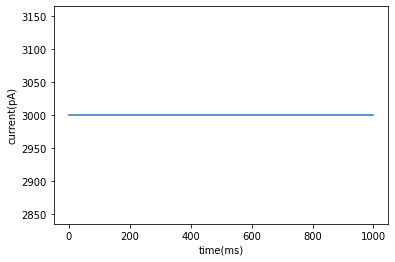

In [62]:
# plot the current
plot_current(current)

In [63]:
population_inner_current, population, spikes, voltage = process(current, connection, neurons_1)

In [64]:
population_inner_current

tensor([9.3028, 7.0521, 8.3836, 7.0938, 5.7215, 7.5187, 7.3563, 7.8031, 7.4545,
        5.5970, 7.6460, 7.7902, 8.1542, 4.7087, 7.9813])

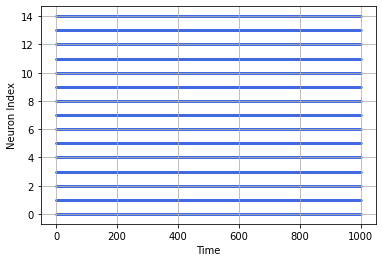

In [65]:
# raster plot 
sf.raster_plot(spikes, dt = 1)

### try step current

In [66]:
dt = 0.05

In [67]:
neurons_2 = sf.LIFPopulation(n = number_nourons, dt = dt, tau_s= 10, refrac_length=0, R = 20)

In [68]:
connection_1 = sf.Connection(pre=neurons_2, post=neurons_2)

In [69]:
step_curr = step_current()

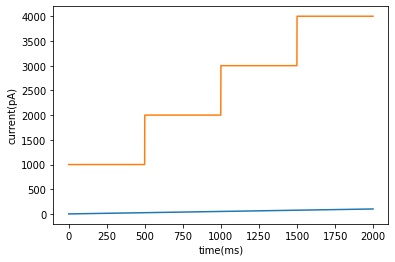

In [70]:
plot_current(step_curr)

In [71]:
population_inner_current, population, spikes, voltage = process(step_curr['value'], connection_1, neurons_2)

In [72]:
population_inner_current

tensor([7.6094, 8.4937, 6.1200, 6.6553, 7.6200, 9.7340, 6.6847, 5.5302, 7.3923,
        7.9326, 6.0574, 8.8053, 7.3927, 8.5004, 6.4733])

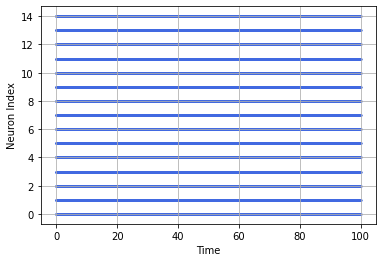

In [73]:
sf.raster_plot(spikes, dt = 0.05)

### sin current

In [107]:
dt = 0.05

In [108]:
neurons_3 = sf.LIFPopulation(n = 15, dt = dt, refrac_length=0)

In [109]:
current = sin_current()

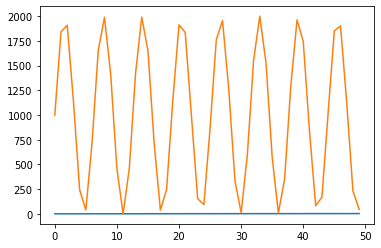

In [110]:
plt.plot(current[:50])[0]

In [111]:
connection_2 = sf.Connection(pre=neurons_3, post=neurons_3)

In [112]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_2, neurons_3)

In [113]:
population_inner_current

tensor([6.7814, 7.6466, 7.6069, 8.2811, 7.3797, 9.2695, 6.9541, 4.9389, 9.4164,
        8.4023, 6.5268, 6.7785, 8.2190, 6.2680, 8.9733])

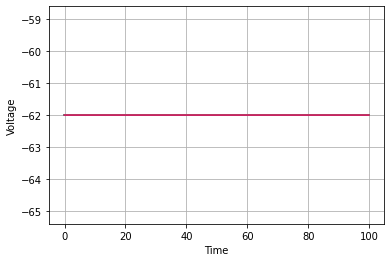

In [114]:
sf.plot_potential(voltage, dt = 0.05)

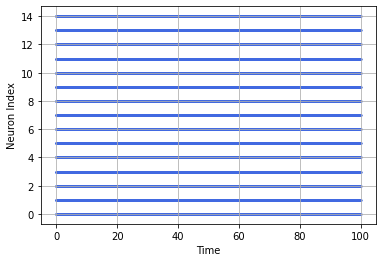

In [115]:
sf.raster_plot(spikes, dt = 0.05)

## Guassian connection 
we first try constant current

In [132]:
guassian_weight = torch.stack([abs(torch.randn(number_nourons) * 100) for _ in range(number_nourons)], dim = 1)

In [133]:
current = constant_cuurent()

In [134]:
dt = 1

In [135]:
neurons_G1 = sf.LIFPopulation(n = 15, dt = dt)

In [136]:
connection_G1 = sf.Connection(pre = neurons_G1, post=neurons_G1, w = guassian_weight)

In [137]:
population_inner_current, population, spikes, voltage = process(current, connection_G1, neurons_G1)

In [138]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

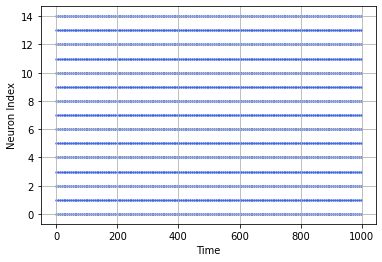

In [139]:
sf.raster_plot(spikes, dt = 1)

### try step current

In [141]:
dt = 0.05

In [143]:
neurons_G2 = sf.LIFPopulation(n = 15, dt = dt)

In [144]:
connection_G2 = sf.Connection(pre = neurons_G2, post=neurons_G2, w = guassian_weight)

In [145]:
current = step_current()

In [147]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_G2, neurons_G2)

In [148]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

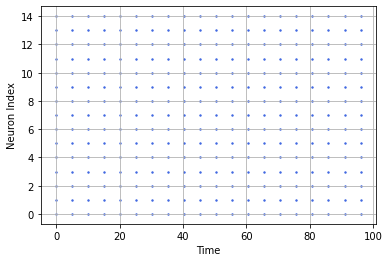

In [150]:
sf.raster_plot(spikes, dt = 0.05)

### try sin current

In [ ]:
dt = 0.05

In [151]:
neurons_G3 = sf.LIFPopulation(n = 15, dt = dt)

In [152]:
connection_G3 = sf.Connection(pre=neurons_G3, post=neurons_G3, w = guassian_weight)

In [153]:
current = sin_current()

In [154]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_G3, neurons_G3)

In [155]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

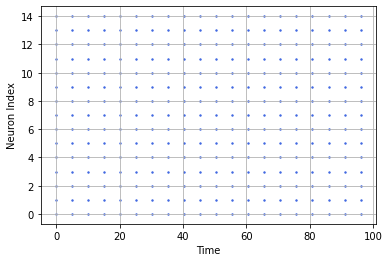

In [156]:
sf.raster_plot(spikes, dt = 0.05)

## ALL to ALL connection scaling with number of neurons

In [157]:
J0 = 5
N = 15

In [161]:
weights = torch.stack([torch.tensor([J0 / N] * N) for _ in range(N)], dim = 1)

we will start with constant current.

In [165]:
current = constant_cuurent()

In [166]:
dt = 1

In [167]:
neurons_A1 = sf.LIFPopulation(n = N, dt = dt)

In [168]:
connection_A1 = sf.Connection(pre =neurons_A1, post = neurons_A1, w = weights)

In [169]:
population_inner_current, population, spikes, voltage = process(current, connection_A1, neurons_A1)

In [170]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

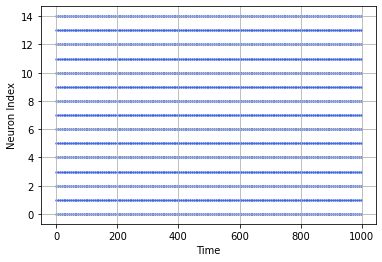

In [173]:
sf.raster_plot(spikes, dt = 1)

# Question 2

In [2]:
import torch
import synapticflow as sf
import math

In [9]:
# generate the popolations 
population_E1, population_E2 = sf.LIFPopulation(n = 5), sf.LIFPopulation(n = 5)
population_I = sf.LIFPopulation(n = 5, is_inhibitory=True)

In [10]:
#set the connections between the individual population neurons(normal weights)
connection_I = sf.Connection(pre = population_I, post=population_I)
connection_E1 = sf.Connection(pre = population_E1, post=population_E1)
connection_E2 = sf.Connection(pre=population_E2, post = population_E2)

In [13]:
# set the connection with other neurons populations
connection_IE1 = sf.Connection(pre = population_I, post = population_E1)
connection_EI1 = sf.Connection(pre = population_E1, post=population_I)
connection_IE2 = sf.Connection(pre = population_I, post=population_E2)
connection_EI2 = sf.Connection(pre = population_E2, post = population_I)

In [ ]:
def process(current1 , current2):
    spikes_E1 = []
    spikes_E2 = []
    spikes_I = []
    inner_current1 = torch.zeros_like(torch.tensor([0] * 5))
    inner_current2 = torch.zeros_like(torch.tensor([0] * 5))
    for i in range(len(current1)):
        # E1
        curr1 = torch.tensor([current1[i]] * 5) + inner_current1
        spikes_e1 = population_E1.forward(curr1)
        # E2
        curr2 = torch.tensor([current2[i]] * 5) + inner_current2
        spikes_e2 = population_E2.forward(curr2)
        # EI1
        # I
        # EI2
        # I
        # IE1
        # IE1